# Kernel density estimation

A small script to estimate the 2D probability density of particle positions (i.e., what is the likelihood that a given region contains a particle).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

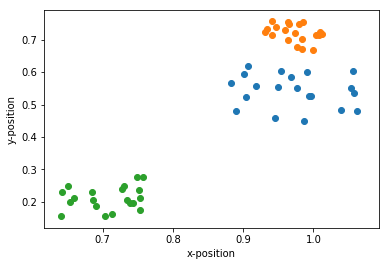

In [2]:
np.random.seed(4)

# Request 3 force chains, each with 20 particles
N_chains = 3
N_particles = 20

# Mean locations of force chains
mean_locs = np.random.rand(N_chains, 2)
# Mean dispersion of particles around mean
dispersion = (np.random.rand(N_chains) + 1) * 0.1
# Random particle positions
particles = np.random.rand(N_chains, N_particles, 2) - 0.5

for i in range(N_chains):
    # Scale particle position by dispersion
    particles[i] *= dispersion[i]
    # Add force chain mean location
    particles[i] += mean_locs[i]
    # Visualise particle positions
    plt.scatter(particles[i, :, 0], particles[i, :, 1])
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.show()

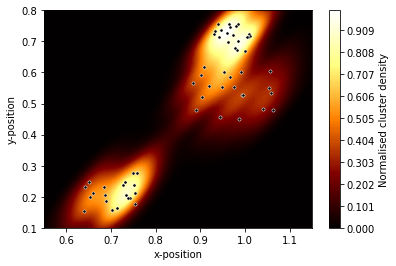

In [3]:
# Kernel sampling grid size
N_grid = 100
xmin, xmax = 0.55, 1.15
ymin, ymax = 0.1, 0.8

# Select the 'bandwidth' of the method
# Small value = tight clustering around data
# Large value = smooth interpolation between data
bandwidth = 0.3

# Generate sampling grid
x = np.linspace(xmin, xmax, N_grid)
y = np.linspace(ymin, ymax, N_grid)
X, Y = np.meshgrid(x, y)

# Reshape sampling grid
xy_eval = np.vstack([X.ravel(), Y.ravel()])
# Lump/reshape particle positions
xy_data = particles.reshape((-1, 2)).T
# Estimate Gaussian kernel density
kernel = gaussian_kde(xy_data, bw_method=bandwidth)
# Sample Gaussian kernel density
Z = np.reshape(kernel(xy_eval).T, X.shape)
# Normalise kernel density
Z /= Z.max()

# Plot kernel density
CS = plt.contourf(X, Y, Z, cmap="afmhot", levels=np.linspace(0, 1, 100))
# Plot particle positions
plt.scatter(xy_data[0], xy_data[1], c="k", s=10, lw=0.5, edgecolor="white")
# Axis formatting
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.colorbar(CS, label="Normalised cluster density")
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.show()